In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('weight-height.csv')
data['Weight'] = data['Weight'] * 0.45
data['Height'] = data['Height'] * 2.54
print(data.head())

  Gender      Height      Weight
0   Male  187.571423  108.852103
1   Male  174.706036   73.039713
2   Male  188.239668   95.733385
3   Male  182.196685   99.019112
4   Male  177.499761   92.857410


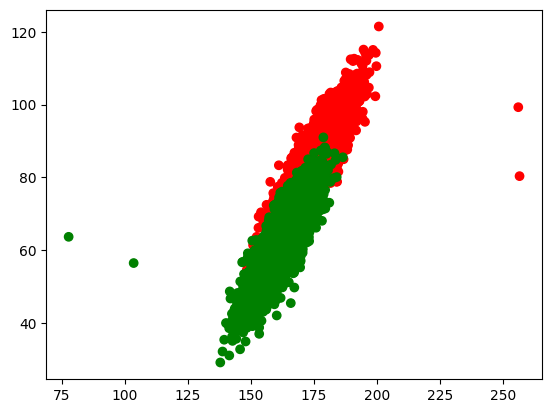

In [5]:
colors = {'Male':'red', 'Female':'green'}
plt.scatter(data['Height'], data['Weight'], c=data['Gender'].apply(lambda x: colors[x]))

In [6]:
# Xây dựng mô hình K-NN với tập dữ liệu, với k = 5
from sklearn.neighbors import KNeighborsClassifier
number_neighbors = 5

neigh = KNeighborsClassifier(n_neighbors=number_neighbors)
neigh.fit(data[['Weight', 'Height']], data['Gender'])

KNeighborsClassifier()

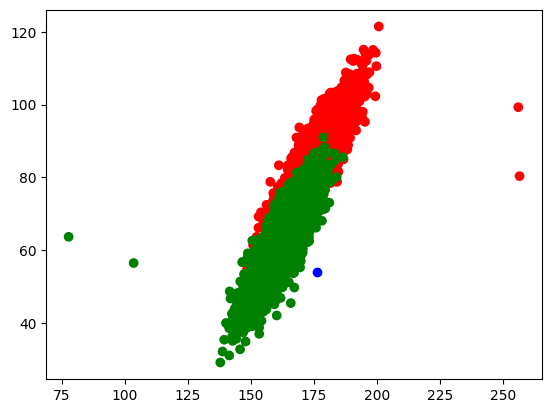

Gioi tinh du doan la ['Female']


d:\Workspace\TriTueNhanTao\envs\ai_class\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [7]:
# Nhập chiều cao và cân nặng từ đó dự đoán giới tính
height = 176
weight = 54
plt.scatter(data['Height'], data['Weight'], c=data['Gender'].apply(lambda x: colors[x]))
plt.scatter(height, weight, c='blue')
plt.show()
gender_predict = neigh.predict([[weight, height]])
print(f'Gioi tinh du doan la {gender_predict}')

In [8]:
# Lấy index của k điểm gần nhất
neighbors_index = neigh.kneighbors([[weight, height]], number_neighbors, return_distance=False)[0]
neighbors = data.iloc[neighbors_index]
neighbors

d:\Workspace\TriTueNhanTao\envs\ai_class\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Gender,Height,Weight
7027,Female,169.474995,55.257180
6071,Female,169.600159,56.862105
7103,Female,169.656575,57.193550
5893,Female,168.624086,55.924898
9919,Female,169.648103,58.238787


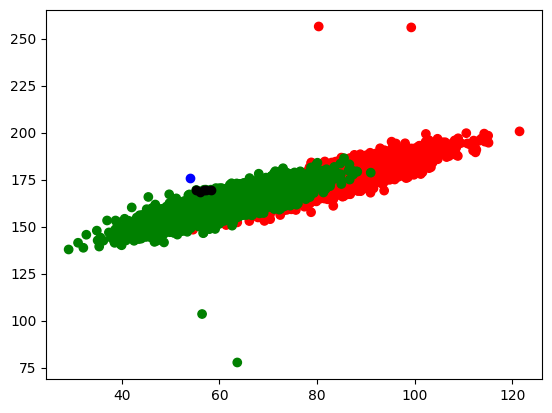

In [11]:
plt.scatter(data['Weight'], data['Height'], c = data['Gender'].apply(lambda
x:colors[x]))
plt.scatter(weight, height, c = 'b')
plt.scatter(neighbors['Weight'], neighbors['Height'], c = 'k')
plt.show()
